In [4]:
# Import necessary libraries
import pandas as pd

# Load the dataset 
file_path = 'Telecust1.csv.xls' 
df = pd.read_csv(file_path)

# Display the dataset
df.head(1000)


,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,A
1,3,11,33,136,1,7,5,5,0,0,6,D
2,3,68,52,116,1,24,1,29,0,1,2,C
3,2,33,33,33,0,12,2,0,0,1,1,A
4,2,23,30,30,1,9,1,2,0,0,4,C
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,27,0,0,3,0,0,1,3,A
996,1,7,34,22,0,2,5,5,0,1,1,A
997,3,67,59,944,0,40,5,33,0,1,1,D
998,3,70,49,87,0,18,2,22,0,1,1,C


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 region     0
tenure     0
age        0
income     0
marital    0
address    0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64


In [4]:
# List the columns in the dataset
print("Columns in the dataset:", df.columns)


Columns in the dataset: Index(['region', 'tenure', 'age', 'income', 'marital', 'address', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')


In [5]:
# Transform the target variable 'custcat' into a binary classification problem
df['custcat_binary'] = df['custcat'].apply(lambda x: 1 if x == 'A' else 0)

# Show the new column to verify the transformation
df[['custcat', 'custcat_binary']].head()


,custcat,custcat_binary
0,A,1
1,D,0
2,C,0
3,A,1
4,C,0


In [6]:
from sklearn.model_selection import train_test_split

# Define features (all columns except target variable) and target (binary custcat)
X = df.drop(columns=['custcat', 'custcat_binary'])  # Features
y = df['custcat_binary']  # Target

# Split the dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the resulting datasets
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (700, 11)
Test data shape: (300, 11)


In [7]:
# Binarize the continuous features
for column in ['tenure', 'age', 'income', 'address', 'ed', 'employ', 'reside']:
    median_value = df[column].median()
    df[column] = df[column].apply(lambda x: 1 if x > median_value else 0)

# Verify the binarization
df.head()


,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat,custcat_binary
0,2,0,1,1,1,0,1,0,0,0,0,A,1
1,3,0,0,1,1,0,1,0,0,0,1,D,0
2,3,1,1,1,1,1,0,1,0,1,0,C,0
3,2,0,0,0,0,1,0,0,0,1,0,A,1
4,2,0,0,0,1,0,0,0,0,0,1,C,0


In [8]:
!pip install pyTsetlinMachine
^

In [11]:
from pyTsetlinMachine.tm import MultiClassTsetlinMachine

help(MultiClassTsetlinMachine)


Help on class MultiClassTsetlinMachine in module pyTsetlinMachine.tm:

class MultiClassTsetlinMachine(builtins.object)
 |  MultiClassTsetlinMachine(number_of_clauses, T, s, boost_true_positive_feedback=1, number_of_state_bits=8, indexed=True, append_negated=True, weighted_clauses=False, s_range=False, clause_drop_p=0.0, literal_drop_p=0.0, max_included_literals=None)
 |  
 |  Docstring for class MultiClassTsetlinMachine.
 |  
 |  Methods defined here:
 |  
 |  __del__(self)
 |  
 |  __getstate__(self)
 |      Helper for pickle.
 |  
 |  __init__(self, number_of_clauses, T, s, boost_true_positive_feedback=1, number_of_state_bits=8, indexed=True, append_negated=True, weighted_clauses=False, s_range=False, clause_drop_p=0.0, literal_drop_p=0.0, max_included_literals=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __setstate__(self, state)
 |  
 |  fit(self, X, Y, epochs=100, incremental=False)
 |  
 |  get_state(self)
 |  
 |  predict(self, X)
 |  
 |

In [7]:
# Import necessary library
import pandas as pd

# Load the dataset 
file_path = 'Telecust1.csv.xls' 
df = pd.read_csv(file_path)




In [3]:
# Step 1: Import necessary libraries
import pandas as pd

# Step 2: Load the dataset (adjust the file path based on where it's located)
file_path = 'Telecust1.csv.xls'  # Use the correct path for your file
df = pd.read_csv(file_path)

# Step 3: Feature and Target Extraction
# Features: All columns except 'custcat' (which is the target)
X = df.drop('custcat', axis=1)

# Target: 'custcat' column, which is the label we're trying to predict
y = df['custcat']

# Display the first few rows to verify
print(X.head())
print(y.head())


   region  tenure  age  income  marital  address  ed  employ  retire  gender  \
0       2      13   44      64        1        9   4       5       0       0   
1       3      11   33     136        1        7   5       5       0       0   
2       3      68   52     116        1       24   1      29       0       1   
3       2      33   33      33        0       12   2       0       0       1   
4       2      23   30      30        1        9   1       2       0       0   

   reside  
0       2  
1       6  
2       2  
3       1  
4       4  
0    A
1    D
2    C
3    A
4    C
Name: custcat, dtype: object


In [4]:
# Step 3: Convert 'custcat' to a binary classification problem
# Let's convert 'A' into 1 and all others into 0 for binary classification
y_binary = y.apply(lambda x: 1 if x == 'A' else 0)

# Display the first few rows of the binary target
print(y_binary.head())


0    1
1    0
2    0
3    1
4    0
Name: custcat, dtype: int64


In [5]:
from sklearn.preprocessing import Binarizer

# Step 4: Binarize the features
# Initialize the binarizer with the threshold as the median of each feature
binarizer = Binarizer()

# Fit and transform the features to binary values
X_binary = binarizer.fit_transform(X)

# Display the first few rows of the binarized features
print(X_binary[:5])


[[1 1 1 1 1 1 1 1 0 0 1]
 [1 1 1 1 1 1 1 1 0 0 1]
 [1 1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 0 1 1 0 0 1 1]
 [1 1 1 1 1 1 1 1 0 0 1]]


In [7]:
from sklearn.metrics import accuracy_score

# Step 8: Predict on the test data
y_pred = tm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")


Accuracy on the test set: 70.00%


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 9: Initialize and train Logistic Regression
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%")

# Step 10: Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")


Logistic Regression Accuracy: 70.00%
Random Forest Accuracy: 70.00%


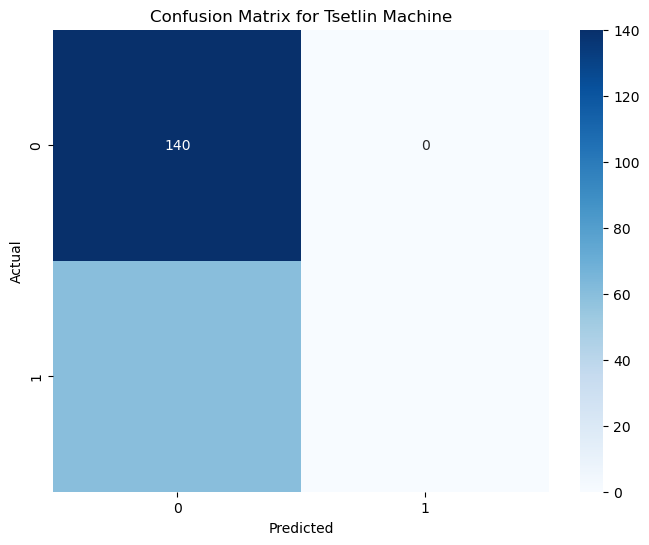

Classification Report for Tsetlin Machine:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       140
           1       0.00      0.00      0.00        60

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.49      0.70      0.58       200



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Tsetlin Machine
cm_tm = confusion_matrix(y_test, tm.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Tsetlin Machine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report for Tsetlin Machine
print("Classification Report for Tsetlin Machine:")
print(classification_report(y_test, tm.predict(X_test)))



In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Load your dataset
file_path = 'Telecust1.csv.xls'  # Adjust this based on your file location
df = pd.read_csv(file_path)

# Feature and target extraction
X = df.drop('custcat', axis=1)
y = df['custcat']

# Convert target variable to binary
y_binary = y.apply(lambda x: 1 if x == 'A' else 0)

# Binarize features
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()
X_binary = binarizer.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)


In [4]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Logistic Regression Accuracy: 70.00%
Random Forest Accuracy: 70.00%


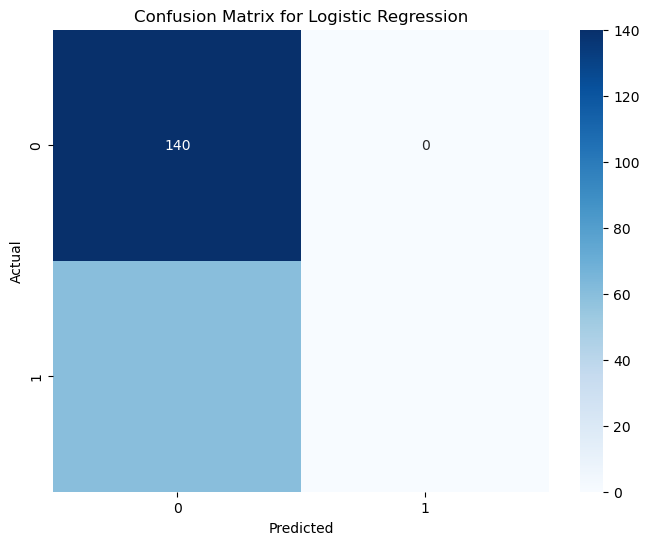

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       140
           1       0.00      0.00      0.00        60

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.49      0.70      0.58       200



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


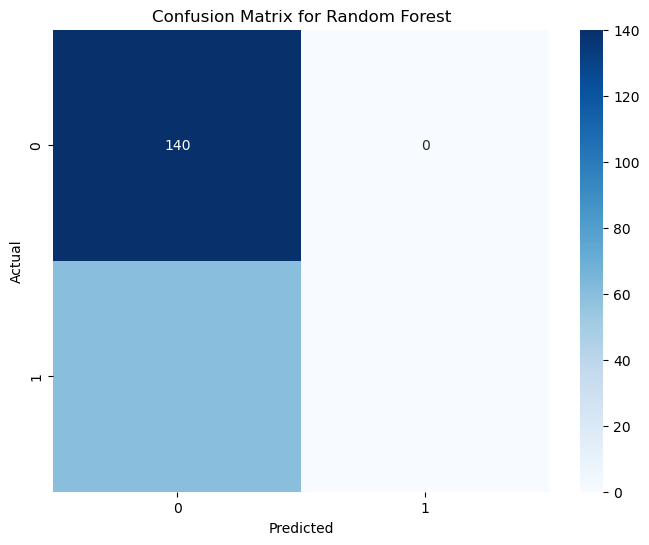

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       140
           1       0.00      0.00      0.00        60

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.49      0.70      0.58       200



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%")
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report for Logistic Regression
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# Repeat for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report for Random Forest
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))
